In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

In [ ]:
pip install numpy


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [8]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing


In [9]:
data.shape

(7920, 3)

In [10]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## Text Preprocessing

In [13]:
import re
import string

## Convert Uppercase to lowercase

In [14]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [16]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [17]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

## Remove link

In [20]:

data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', word) for word in x.split()))


In [21]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test #android #apps #b...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove punctuations

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [26]:
data["tweet"].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

Remove numbers

In [27]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app mobil...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [28]:
data["tweet"] = data['tweet'].str.replace('\d+','',regex=True)

In [29]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app mobil...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Remove stopwords

In [31]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [32]:
import nltk

In [33]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [34]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines()

In [35]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join([word for word in x.split() if word not in sw]))

In [39]:
data["tweet"].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [41]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()


In [42]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [43]:
data["tweet"].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [44]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


##Building Vocabulary

In [47]:
from collections import Counter
vocab = Counter() 

In [50]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [52]:
len(vocab)

15951

In [53]:
data.shape

(7920, 3)

In [54]:
tokens = [key for key in vocab if vocab[key] >10]

In [55]:
len(tokens)

1145

In [57]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w' , encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

## Divide Dataset (for train & testing)

In [58]:
x = data["tweet"]
y = data ["label"]

In [60]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Collecting scikit-learn
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 2.1 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/11.0 MB 2.5 MB/s eta 0:00:04
   ------- -------------------------------- 2.1/11.0 MB 2.7 MB/s eta 0:00:04
   -------- ------------------------------- 2.4/11.0 MB 2.7 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.0 MB 2.4 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/11.0 MB 2.0 MB/s eta 0:00:05
   ----------- ---------------------------- 3.1/11.0 MB 1.9 MB/s eta 0:00:05
   ------------ --------------------------- 3.4/11.0 MB 1.9 MB/s eta 0:00:05
   ------------ --------------------------- 3.4/11.0 MB 1.9 MB/s eta 0:00:05
   -----

In [67]:
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [68]:
x_train.shape

(6336,)

In [69]:
y_test.shape

(1584,)

In [70]:
y_test

2468    0
904     0
3773    1
633     0
2298    0
       ..
2284    0
4325    0
3202    0
2571    1
3538    0
Name: label, Length: 1584, dtype: int64

## Vectorization

In [71]:
def vectorizer(ds, vocabulary):
    vectorized_1st = []

    for sentence in ds:
        sentence_1st = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_1st[i] = 1

        vectorized_1st.append(sentence_1st)

    vectorized_1st_new = np.asarray(vectorized_1st, dtype=np.float32)

    return vectorized_1st_new

In [72]:
vectorized_x_train = vectorizer(x_train, tokens)

In [73]:
vectorized_x_test = vectorizer(x_test, tokens)

In [74]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [75]:
y_train

6440    0
3770    0
7864    0
5449    1
2582    0
       ..
7793    1
7691    1
7588    0
7298    0
880     0
Name: label, Length: 6336, dtype: int64

In [76]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [77]:
y_test

2468    0
904     0
3773    1
633     0
2298    0
       ..
2284    0
4325    0
3202    0
2571    1
3538    0
Name: label, Length: 1584, dtype: int64

In [78]:
y_train.value_counts()

label
0    4711
1    1625
Name: count, dtype: int64

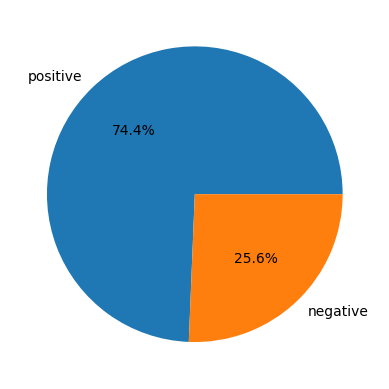

In [79]:
plt.pie(
    np.array([y_train.value_counts()[0], y_train.value_counts()[1]]),
    labels=['positive', 'negative'],
    autopct='%1.1f%%'
)
plt.show()

## Hanadle Imbalance dataset

In [80]:
pip install imbalanced-learn

In [83]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9422, 1145) (9422,)


In [84]:
y_train_smote.value_counts()

label
0    4711
1    4711
Name: count, dtype: int64

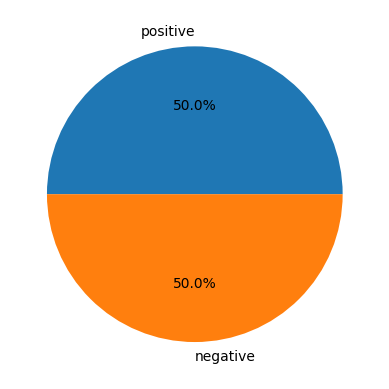

In [85]:
plt.pie(
    np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]),
    labels=['positive', 'negative'],
    autopct='%1.1f%%'
)
plt.show()

In [86]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [87]:
y_train_smote

0       0
1       0
2       0
3       1
4       0
       ..
9417    1
9418    1
9419    1
9420    1
9421    1
Name: label, Length: 9422, dtype: int64

In [90]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [91]:
y_test

2468    0
904     0
3773    1
633     0
2298    0
       ..
2284    0
4325    0
3202    0
2571    1
3538    0
Name: label, Length: 1584, dtype: int64

## Model Training Evaluation

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [115]:
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred),3)
    pr = round(precision_score(y_act, y_pred),3)
    rec = round(recall_score(y_act, y_pred),3)
    f1 = round(f1_score(y_act, y_pred),3)
    print(f'Training Score : \n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred),3)
    pr = round(precision_score(y_act, y_pred),3)
    rec = round(recall_score(y_act, y_pred),3)
    f1 = round(f1_score(y_act, y_pred),3)
    print(f'Testing score : \n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')


###Logistic Regression

In [131]:
lr = LogisticRegression()

lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test, y_test_pred)


Training Score : 
	Accuracy = 0.94
	Precision = 0.915
	Recall = 0.97
	F1-Score = 0.942
Testing score : 
	Accuracy = 0.867
	Precision = 0.695
	Recall = 0.843
	F1-Score = 0.762


###Naive Bayes

In [125]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test, y_test_pred)



Training Score : 
	Accuracy = 0.91
	Precision = 0.872
	Recall = 0.962
	F1-Score = 0.915
Testing score : 
	Accuracy = 0.87
	Precision = 0.68
	Recall = 0.92
	F1-Score = 0.782


### Decision Tree

In [126]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test, y_test_pred)



Training Score : 
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing score : 
	Accuracy = 0.829
	Precision = 0.668
	Recall = 0.646
	F1-Score = 0.657


### Random Forest

In [128]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test, y_test_pred)



Training Score : 
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing score : 
	Accuracy = 0.867
	Precision = 0.741
	Recall = 0.728
	F1-Score = 0.735


###Support vector machine

In [130]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test, y_test_pred)




Training Score : 
	Accuracy = 0.979
	Precision = 0.964
	Recall = 0.996
	F1-Score = 0.98
Testing score : 
	Accuracy = 0.868
	Precision = 0.711
	Recall = 0.808
	F1-Score = 0.756


In [132]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr,file)